# CREDIT CARD FRAUD DETECTION PROJECT

# Understanding the Problem statement and about the dataset

In [1]:
'''
It is important that credit card companies are able to recognize fraudulent credit card transactions so 
that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, 
due to confidentiality issues, we cannot provide the original features and more background information about the data.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been 
transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between 
each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount,
this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 for legit transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall 
Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
'''

"\nIt is important that credit card companies are able to recognize fraudulent credit card transactions so \nthat customers are not charged for items that they did not purchase.\n\nThe dataset contains transactions made by credit cards in September 2013 by European cardholders.\nThis dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. \nThe dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\n\nIt contains only numerical input variables which are the result of a PCA transformation. Unfortunately, \ndue to confidentiality issues, we cannot provide the original features and more background information about the data.\nFeatures V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been \ntransformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between \neach transaction and the first transaction in the dataset. T

# Steps involved in the project 

In [2]:
'''
STEP 1: Collecting the data
STEP 2: Data Preprocessing
STEP 3: Data Analysis
STEP 4: Train test split 
STEP 5: Logistic Regression Machine Learning Algorithm used
STEP 6: Evaluation
'''

'\nSTEP 1: Collecting the data\nSTEP 2: Data Preprocessing\nSTEP 3: Data Analysis\nSTEP 4: Train test split \nSTEP 5: Logistic Regression Machine Learning Algorithm used\nSTEP 6: Evaluation\n'

In [3]:
#IMPORTING THE REQUIRED PACKAGES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Collecting the data(Kaggle - Credit card data)

In [4]:
#LOADING THE DATASET 
data = pd.read_csv('/Users/soumobratamanna/Documents/venv_data_science_projects/projects/ds_pro/creditcard.csv')

# STEP 2: Data Preprocessing 

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Checking the number of missing values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# STEP 3: Data Analysing

In [9]:
#Distribution of legit transactions and fraudulent transactions 
# 1: FRAUDULENT TRANSACTION 
#0: LEGIT TRANSACTION
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

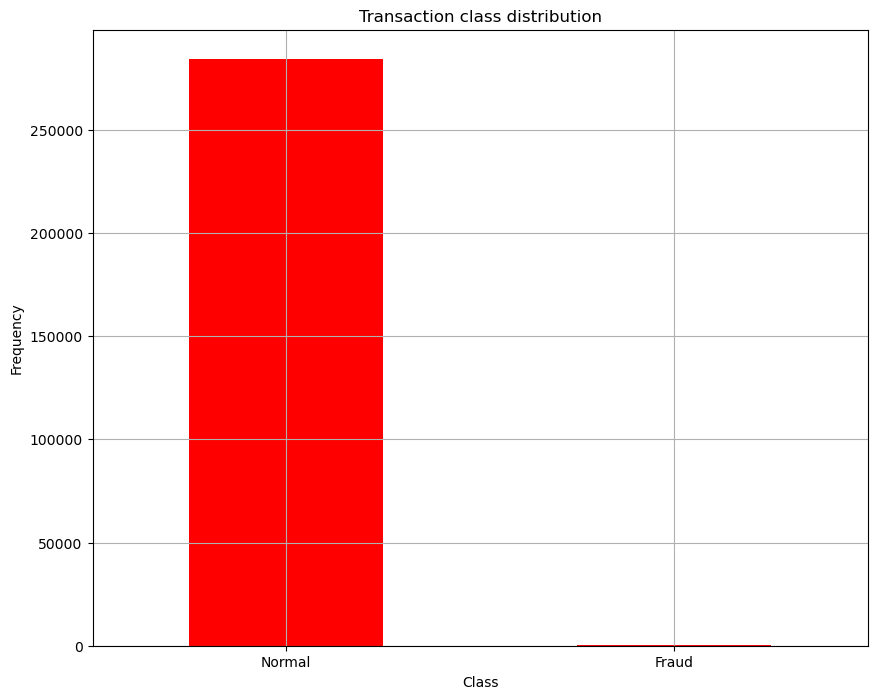

In [10]:
plt.figure(figsize = (10,8))
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'red')
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.grid()
plt.xlabel("Class")
plt.ylabel("Frequency")

<AxesSubplot:>

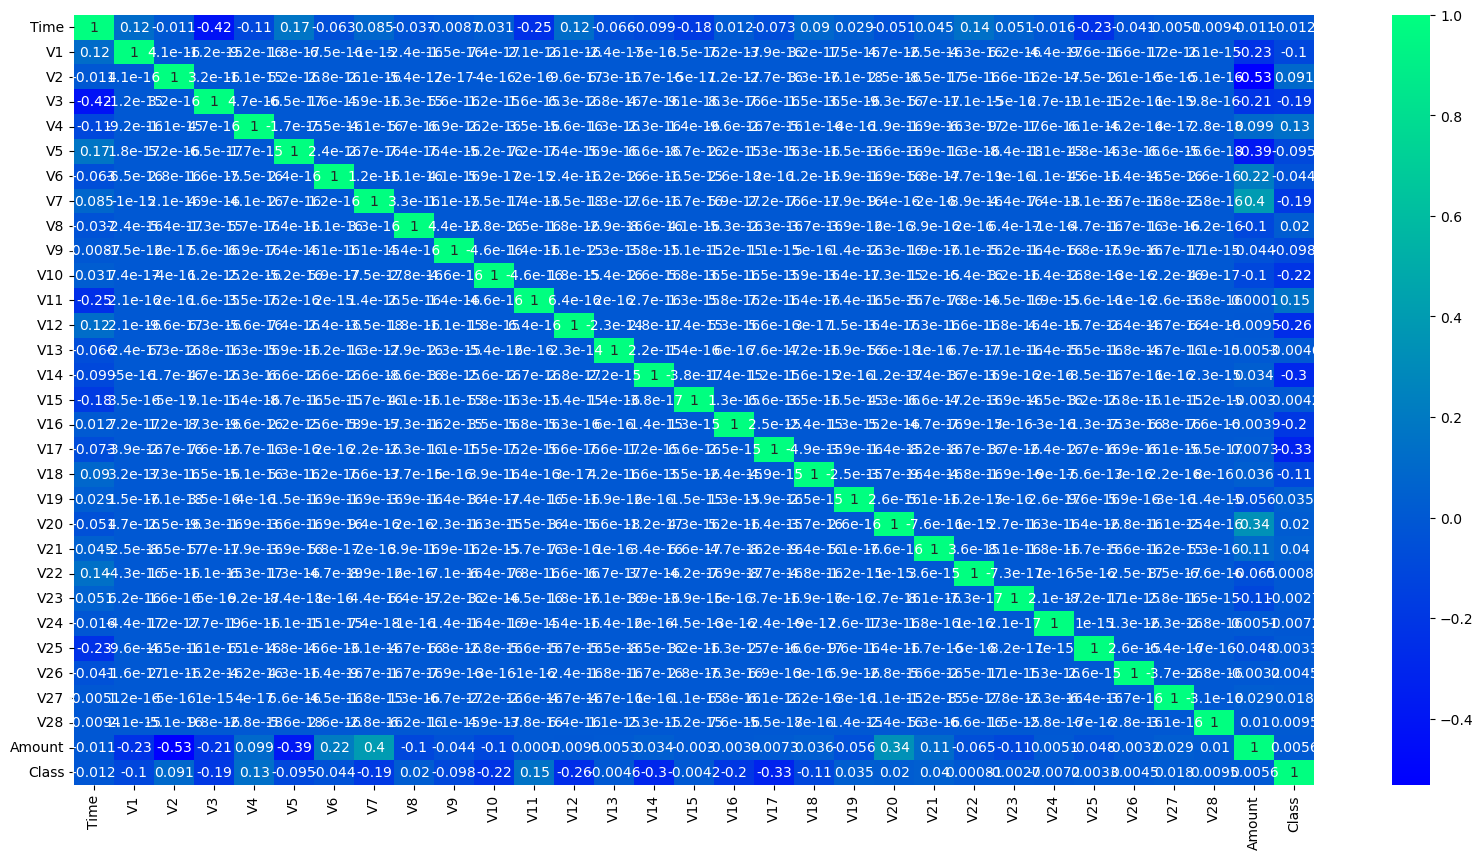

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True, cmap= "winter")

In [12]:
'''
This dataset is highly unbalanced since we have more than 99% data as legit and the remaining as fraud
, so if we train the model with this dataset , then at the time of testing with new fraud data 
it will recognise as normal legit transaction.'''

'\nThis dataset is highly unbalanced since we have more than 99% data as legit and the remaining as fraud\n, so if we train the model with this dataset , then at the time of testing with new fraud data \nit will recognise as normal legit transaction.'

In [13]:
#Separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [14]:
#Checking the shape of the variables
print("The shape of the legit transaction is :",legit.shape)
print("The shape of the fraudulent transaction is :",fraud.shape)

The shape of the legit transaction is : (284315, 31)
The shape of the fraudulent transaction is : (492, 31)


In [15]:
#Statistical measures about the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#Comparing the values for both the transactions 
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
'''
From the above tbale we can see that the differences of mean between the legit and fraudulent transaction 
is being quite high.
'''

'\nFrom the above tbale we can see that the differences of mean between the legit and fraudulent transaction \nis being quite high.\n'

# Under-Sampling

In [19]:
'''
Building a sample dataset containing similar distribution of normal 
i.e legit transactions and fraudulent transactions , creating an even distribution
'''

'\nBuilding a sample dataset containing similar distribution of normal \ni.e legit transactions and fraudulent transactions , creating an even distribution\n'

In [20]:
legit_sample = legit.sample(n = 492)

In [21]:
#concatenating the 2 dataframes (492 + 492 = 984 rows)
new_data = pd.concat([legit_sample,fraud],axis = 0)

In [22]:
new_data.shape

(984, 31)

In [23]:
new_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194673,130711.0,-0.173359,1.432709,-1.536411,0.317444,1.942894,-0.348735,1.885569,-0.463277,-0.618068,...,0.121720,0.603725,-0.123834,-0.049492,-0.521748,-0.728037,0.062763,0.295642,65.75,0
152779,97463.0,2.012970,-0.374130,0.002449,0.405971,-0.614445,-0.049808,-0.915282,-0.072426,2.565988,...,-0.146644,0.021096,0.228660,-0.660914,-0.498326,0.479617,-0.034489,-0.047837,15.95,0
18518,29563.0,1.112361,-0.225516,1.114639,0.684915,-1.264641,-0.857559,-0.488535,0.000680,0.636014,...,0.031538,-0.045700,0.077252,0.720451,0.054902,0.370103,-0.021652,0.035162,49.90,0
132381,79968.0,1.508223,-1.107252,0.043747,-1.487097,-1.203809,-0.538355,-0.900800,-0.187663,-1.745159,...,-0.251168,-0.423104,-0.096871,-0.472619,0.475685,-0.157557,0.019894,0.018238,50.00,0
191935,129463.0,1.779353,-0.416804,-1.215732,0.130965,0.622852,1.544809,-0.748062,0.604543,0.734709,...,-0.197599,-0.505306,0.452489,-0.853828,-0.829565,0.186093,0.019564,-0.028493,44.40,0
213912,139450.0,0.312941,1.385989,0.164342,4.940442,-0.063452,1.167927,-0.549126,-2.368315,-0.916371,...,2.373870,-0.183652,-0.066565,-0.081425,0.309456,0.643985,0.399623,0.313726,46.27,0
157786,110431.0,2.059323,-0.822360,-0.307887,-0.511824,-0.872620,-0.450812,-0.846529,-0.222861,1.180324,...,-0.298382,-0.583880,0.472119,1.030864,-0.512714,-0.673493,-0.017058,-0.029280,50.57,0
63288,50647.0,1.075674,0.061662,1.441563,2.766596,-0.740418,0.648667,-0.712592,0.411150,0.482323,...,-0.194305,-0.386102,0.115403,0.013738,0.190099,-0.055281,0.048582,0.026477,0.00,0
284386,172398.0,-1.559703,1.046929,0.712107,4.380187,-2.110123,3.148191,1.689643,-2.724688,-1.119516,...,2.076736,-0.112441,-0.181983,0.593246,-0.400580,0.486424,1.050721,-0.290550,630.85,0
187400,127518.0,0.342715,-3.404011,-1.143264,1.628163,-1.882635,0.097568,0.222515,-0.049132,1.973174,...,0.693693,0.506864,-0.710481,0.072813,-0.299739,0.550532,-0.163753,0.085820,840.00,0


In [24]:
new_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [26]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94673.026423,0.172728,0.068400,-0.029720,0.136426,-0.016301,-0.030764,0.094858,0.030669,0.128614,...,-0.002613,-0.005284,0.008277,0.006669,-0.020123,-0.016519,-0.016718,0.004391,0.006161,85.483537
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
#Splitting the dataset into features and targets 
X = new_data.iloc[:,:-1]
Y = new_data.iloc[:,-1]

In [28]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
194673,130711.0,-0.173359,1.432709,-1.536411,0.317444,1.942894,-0.348735,1.885569,-0.463277,-0.618068,...,-0.165136,0.121720,0.603725,-0.123834,-0.049492,-0.521748,-0.728037,0.062763,0.295642,65.75
152779,97463.0,2.012970,-0.374130,0.002449,0.405971,-0.614445,-0.049808,-0.915282,-0.072426,2.565988,...,-0.121376,-0.146644,0.021096,0.228660,-0.660914,-0.498326,0.479617,-0.034489,-0.047837,15.95
18518,29563.0,1.112361,-0.225516,1.114639,0.684915,-1.264641,-0.857559,-0.488535,0.000680,0.636014,...,-0.069332,0.031538,-0.045700,0.077252,0.720451,0.054902,0.370103,-0.021652,0.035162,49.90
132381,79968.0,1.508223,-1.107252,0.043747,-1.487097,-1.203809,-0.538355,-0.900800,-0.187663,-1.745159,...,-0.247134,-0.251168,-0.423104,-0.096871,-0.472619,0.475685,-0.157557,0.019894,0.018238,50.00
191935,129463.0,1.779353,-0.416804,-1.215732,0.130965,0.622852,1.544809,-0.748062,0.604543,0.734709,...,-0.148422,-0.197599,-0.505306,0.452489,-0.853828,-0.829565,0.186093,0.019564,-0.028493,44.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [29]:
Y

194673    0
152779    0
18518     0
132381    0
191935    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# STEP 4: Splitting the dataset between training and testing 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state=2)

In [32]:
#Standardising the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
X_train

array([[-0.40628299,  0.28149685, -0.51565949, ...,  0.05860427,
        -0.40371338,  1.83573065],
       [-0.25191551,  0.00298783, -0.77413716, ..., -0.23754281,
        -0.60415407,  0.04581777],
       [-1.56909966,  0.66064554, -0.53964225, ..., -0.1855267 ,
        -0.17191756, -0.37947145],
       ...,
       [ 1.15477463,  0.05129156,  0.51201767, ...,  0.38612449,
        -0.22684229, -0.44159235],
       [-0.94562289, -2.34911863,  1.72653131, ..., -1.3691602 ,
        -1.8004377 , -0.30397067],
       [ 1.08524343,  0.25858771, -0.12507899, ...,  0.11097562,
         0.15681844, -0.4033641 ]])

In [34]:
X_test

array([[ 1.36676248,  0.63280991, -0.11561274, ...,  0.40713399,
         0.45023796, -0.23229271],
       [ 1.23903491,  0.78196511, -0.61101537, ..., -0.04528054,
        -0.23878546, -0.4042367 ],
       [-0.26489604,  0.06578263, -0.97582945, ..., -0.33776466,
         0.23048649,  2.7512971 ],
       ...,
       [-0.41494353,  0.084913  , -0.39175888, ...,  0.23622305,
         0.47146017,  1.58911692],
       [-0.65225474, -0.93388546,  0.15872526, ...,  1.08172265,
         0.76836607, -0.44229874],
       [ 1.63293531,  0.79808114, -0.54274174, ..., -0.1266297 ,
        -0.22822245, -0.44204942]])

In [35]:
print(X,X_train.shape,X_test.shape)

            Time        V1        V2        V3        V4        V5        V6  \
194673  130711.0 -0.173359  1.432709 -1.536411  0.317444  1.942894 -0.348735   
152779   97463.0  2.012970 -0.374130  0.002449  0.405971 -0.614445 -0.049808   
18518    29563.0  1.112361 -0.225516  1.114639  0.684915 -1.264641 -0.857559   
132381   79968.0  1.508223 -1.107252  0.043747 -1.487097 -1.203809 -0.538355   
191935  129463.0  1.779353 -0.416804 -1.215732  0.130965  0.622852  1.544809   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# STEP 5: Loading the model (Logistic Regression)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_lr = LogisticRegression()

In [38]:
#Training the Logisitc Regression model with the training data 
model_lr.fit(X_train,Y_train)

LogisticRegression()

# STEP 6: Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
#Accuracy score on training data
X_train_predict_lr = model_lr.predict(X_train)
train_score_lr = accuracy_score(X_train_predict_lr,Y_train)

In [42]:
print('The accuracy score of the training data:',train_score_lr)

The accuracy score of the training data: 0.9491740787801779


In [44]:
#Accuracy score on testing data
X_test_predict_lr = model_lr.predict(X_test)
test_score_lr = accuracy_score(X_test_predict_lr,Y_test)

In [45]:
print('The accuracy score of the testing data:',test_score_lr)

The accuracy score of the testing data: 0.9238578680203046


In [46]:
'''CONCLUSION:
Since we got a very good accuracy score for both the training data and testing data ,  we can say
that our model has been trained perfectly to detect the fraudulent transactions of the credit card .'''

'CONCLUSION:\nSince we got a very good accuracy score for both the training data and testing data ,  we can say\nthat our model has been trained perfectly to detect the fraudulent transactions of the credit card .'

# KNN Implementation

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
model_knn = KNeighborsClassifier(n_neighbors = 1)
model_knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
from sklearn.metrics import accuracy_score

In [65]:
#Accuracy score on training data
X_train_predict_knn = model_knn.predict(X_train)
train_score_knn = accuracy_score(X_train_predict_knn,Y_train)

In [66]:
train_score_knn

1.0

In [67]:
X_test_predict_knn = model_knn.predict(X_test)
test_score_knn = accuracy_score(X_test_predict_knn,Y_test)

In [68]:
test_score_knn

0.9035532994923858

In [78]:
error_rate = [] #for diff k values , the error values will be stored on this variable 
for i in range(1,30):
    
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(X_train,Y_train)
    predict_i = model.predict(X_test)
    
    error_rate.append(np.mean(predict_i != Y_test))

Text(0, 0.5, 'Error Rate')

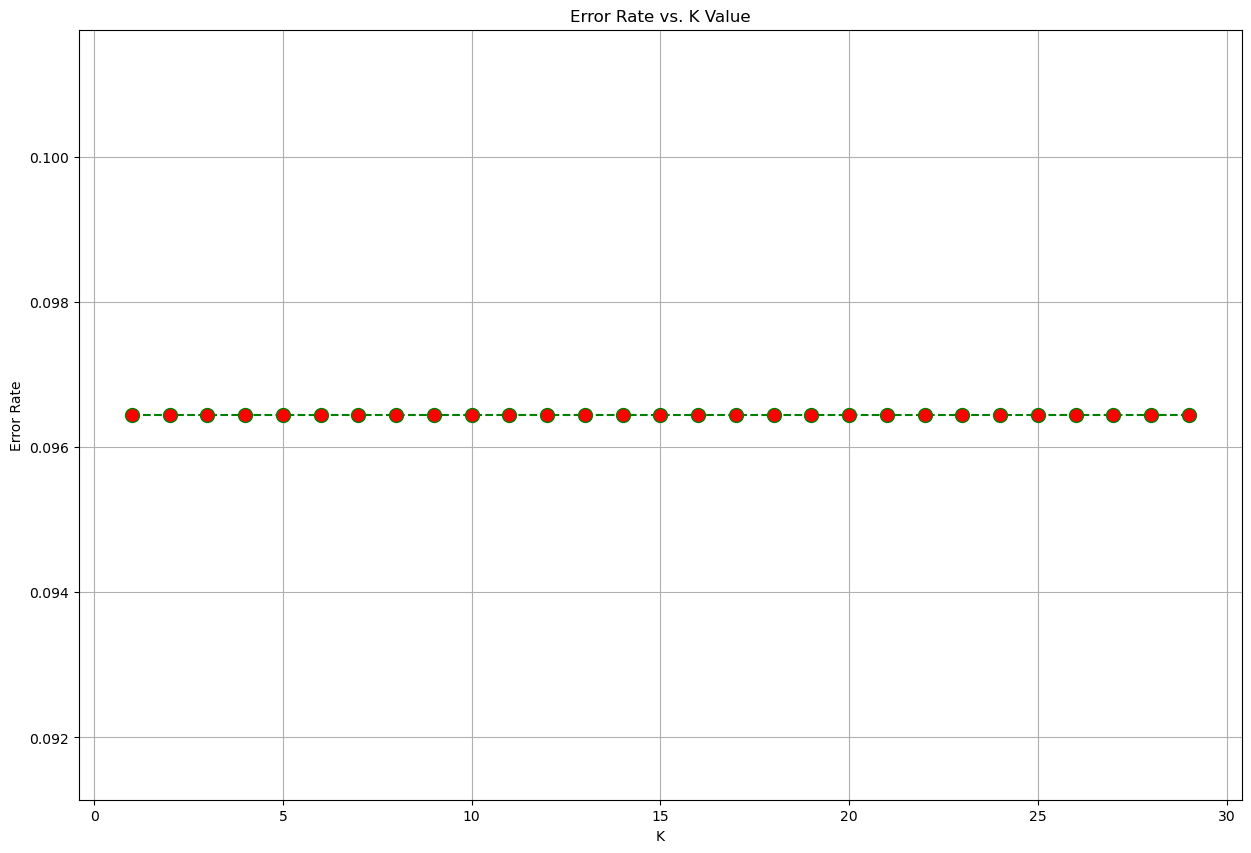

In [79]:
plt.figure(figsize = (15,10))
plt.plot(range(1,30),error_rate , color = 'green',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',
        markersize = 10)
plt.grid()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Naive Bayes Implementation

In [69]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

In [70]:
model_nb.fit(X_train,Y_train)

GaussianNB()

In [60]:
from sklearn.metrics import accuracy_score

In [71]:
#Accuracy score on training data
X_train_predict_nb = model_nb.predict(X_train)
train_score_nb = accuracy_score(X_train_predict_nb,Y_train)

In [72]:
train_score_nb

0.9174078780177891

In [73]:
X_test_predict_nb = model_nb.predict(X_test)
test_score_nb = accuracy_score(X_test_predict_nb,Y_test)

In [74]:
test_score_nb

0.9137055837563451